<a href="https://colab.research.google.com/github/widyamelia26/Facial-Emotion-Recognition/blob/main/Emosi_CNN%20(TanpaTF)%20(67%25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash

# Check if the dataset already exists
if test -e "emotion-detection-fer.zip"; then
    rm -rf emotion-detection-fer.zip ./train ./test
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
else
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
fi

rm -rf ./train/disgusted/ ./test/disgusted/

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0

Archive:  emotion-detection-fer.zip
  inflating: test/angry/im0.png      
  inflating: test/angry/im1.png      
  inflating: test/angry/im10.png     
  inflating: test/angry/im100.png    
  inflating: test/angry/im101.png    
  inflating: test/angry/im102.png    
  inflating: test/angry/im103.png    
  inflating: test/angry/im104.png    
  inflating: test/angry/im105.png    
  inflating: test/angry/im106.png    
  inflating: test/angry/im107.png    
  inflating: test/angry/im108.png    
  inflating: test/angry/im109.png    
  inflating: test/angry/im11.png     
  inflating: test/angry/im110.png    
  inflating: test/angry/im111.png    
  inflating: test/angry/im112.png    
  inflating: test/angry/im113.png    
  inflating: test/angry/im114.png    
  inflating: test/angry/im115.png    
  inflating: test/angry/im116.png    
  inflating: test/angry/im117.png    
  inflating: test/angry/im118

100%|██████████| 65.2M/65.2M [00:03<00:00, 17.6MB/s]


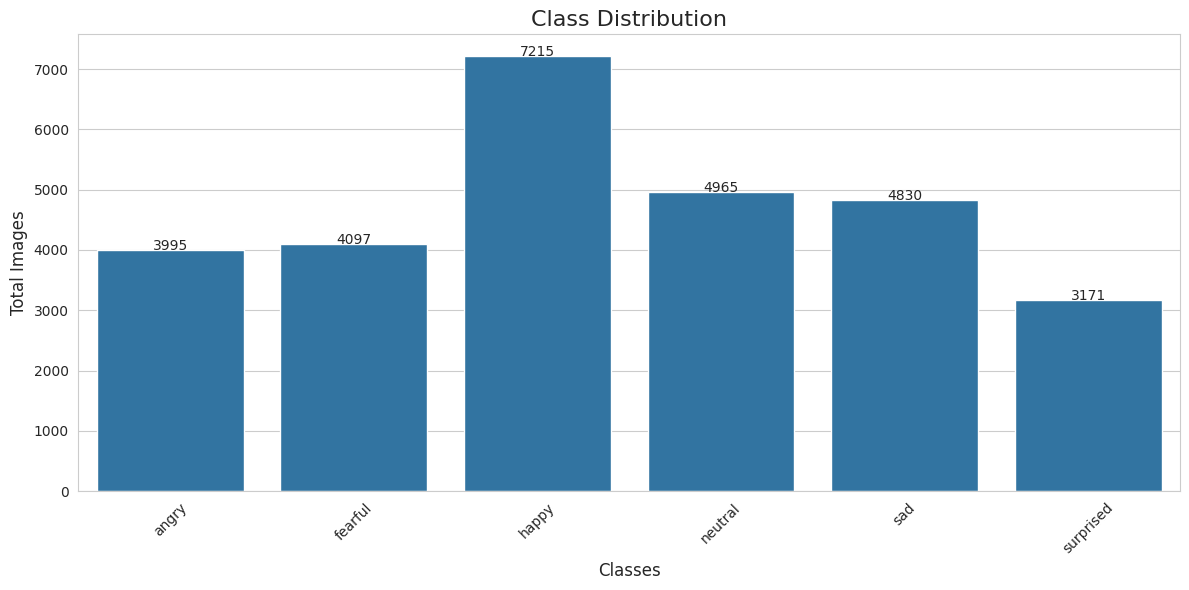

In [ ]:
import glob

import matplotlib.pyplot as plt
import seaborn as sns


train_path = "/content/train"
test_path = "/content/test"
class_names = ["angry", "fearful", "happy", "neutral", "sad", "surprised"]
class_distribution = {}

# Put image paths to dictionary using class names as keys.
for class_name in class_names:
    class_distribution[class_name] = len(glob.glob(f"{train_path}/{class_name}/*"))

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))

plt.title("Class Distribution", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Total Images", fontsize=12)
plt.xticks(rotation=45)

# Add value labels of each bar.
for index, value in enumerate(class_distribution.values()):
    plt.text(index, value, str(value), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

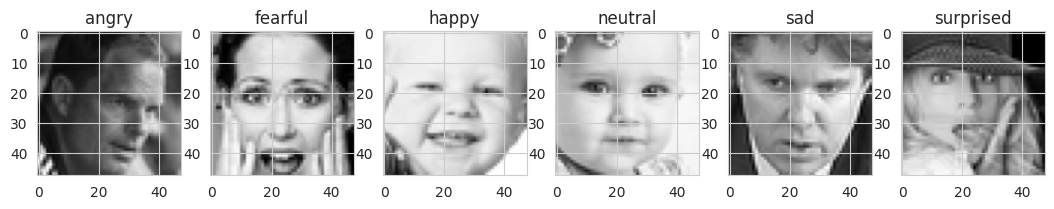

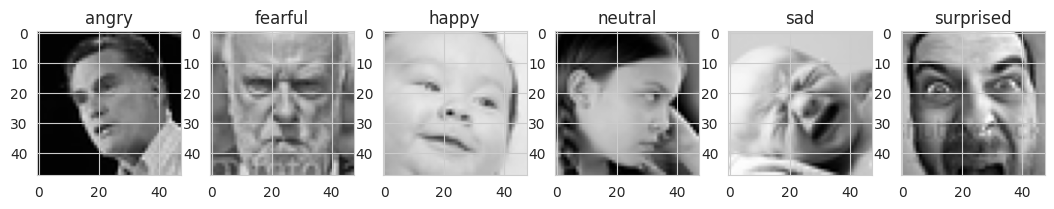

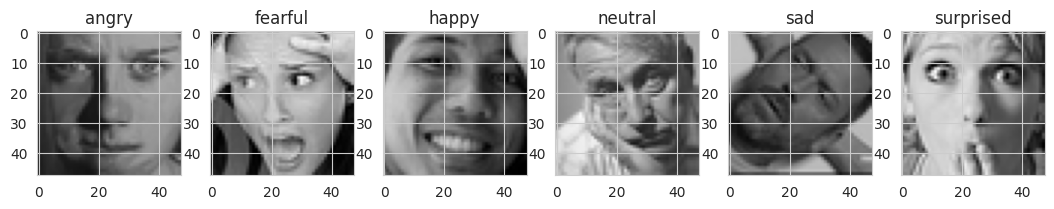

In [ ]:
import cv2
import numpy as np


def plot_sample_images():
    fig, axis = plt.subplots(1, 6, figsize=[13, 15])

    for index, (class_name, count) in enumerate(class_distribution.items()):
        # Randomly choose images to plot.
        random_index = np.random.randint(0, count)
        img_read = cv2.imread(
            glob.glob(f"{train_path}/{class_name}/*")[random_index]
        )

        axis[index].imshow(img_read)
        axis[index].set_title(class_name)

# Plot several samples of each class.
for i in range(0, 3):
    plot_sample_images()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data generator for traning and validation.
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    fill_mode="nearest",
    validation_split=0.2  # 20% of images to be used for validation.
)

train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    classes=["angry", "fearful", "happy", "neutral", "sad", "surprised"],
    subset="training",
    color_mode="grayscale",
    seed = 12
)

validation_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    classes=["angry", "fearful", "happy", "neutral", "sad", "surprised"],
    subset="validation",
    color_mode="grayscale",
    seed = 12
)

Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.


In [ ]:
# Data generator for evaluation.
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    classes=["angry", "fearful", "happy", "neutral", "sad", "surprised"],
    color_mode="grayscale",
    seed = 12  # Keep this False for confusion matrix.
)

Found 7067 images belonging to 6 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d (SpatialDropout2D) │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_1                  │ (None, 12, 12, 128)         │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_2                  │ (None, 6, 6, 256)           │              

 Total params: 7,187,654 (27.42 MB)

 Trainable params: 7,182,278 (27.40 MB)

 Non-trainable params: 5,376 (21.00 KB)

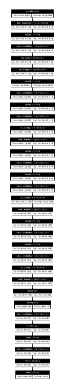

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


model = Sequential()

model.add(Input(shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(128, (3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(256, (3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(512, (3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation="relu", padding='same', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.3))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation="softmax"))

model.summary()

# Gambar flowchart dari model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Menampilkan flowchart dalam notebook
img = plt.imread('cnn_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss=categorical_crossentropy,
    metrics=["accuracy"]
)

# Define callbacks.
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("emotion_detection_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model.
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
    )

# Determine at which epoch early stopping occurred
stopped_epoch = len(history.history['accuracy'])
print(f"Training stopped at epoch: {stopped_epoch}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


707/707 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1894 - loss: 3.4590
Epoch 1: val_accuracy improved from -inf to 0.23629, saving model to emotion_detection_model.keras
707/707 ━━━━━━━━━━━━━━━━━━━━ 74s 77ms/step - accuracy: 0.1894 - loss: 3.4587 - val_accuracy: 0.2363 - val_loss: 2.6761 - learning_rate: 5.0000e-04
Epoch 2/100
706/707 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2059 - loss: 2.8217
Epoch 2: val_accuracy did not improve from 0.23629
707/707 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.2059 - loss: 2.8216 - val_accuracy: 0.2361 - val_loss: 2.5757 - learning_rate: 5.0000e-04
Epoch 3/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2284 - loss: 2.6347
Epoch 3: val_accuracy improved from 0.23629 to 0.26017, saving model to emotion_detection_model.keras
707/707 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.2284 - loss: 2.6347 - val_accuracy: 0.2602 - val_loss: 2.4826 - learning_rate: 5.0000e-04
Epoch 4/100
707/707 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step -

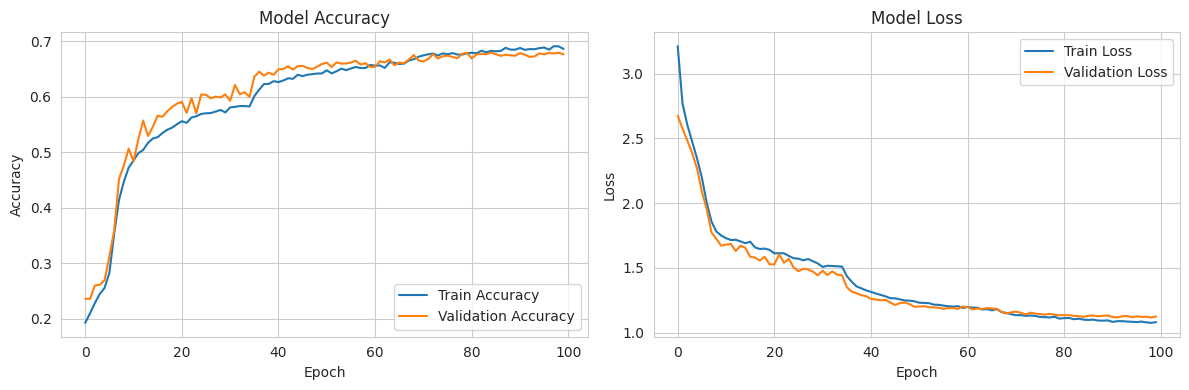

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


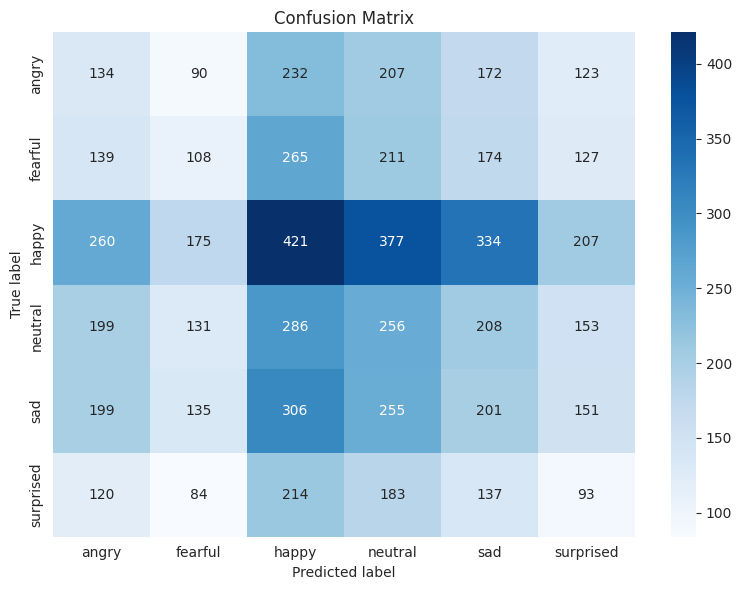

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Nama-nama kelas emosi
class_names = ["angry", "fearful", "happy", "neutral", "sad", "surprised"]

# Peroleh true labels dari test generator
true_labels = test_generator.classes

# Reset test generator sebelum prediksi
test_generator.reset()

# Dapatkan prediksi model pada data test
predicted = model.predict(test_generator)
predicted_labels = np.argmax(predicted, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

## Using Transfer Learning

### VGGNet

### ResNet

### ImageNet